In [4]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#!unzip '/content/drive/MyDrive/personal/images.zip' -d '/content/drive/MyDrive/personal/imgs/'

In [8]:
d = {'crosswalk':0, 'exit':1, 'mwr':2, 'sr':3, 'stair':4, 'stop':5, 'wwr':6, 'bump':7}
# ['crosswalk', 'exit', 'men wash room', 'slippery road', 'stair', 'stop', women wash room', 'bump]
images, labels = [], []
src = '/content/drive/MyDrive/personal/imgs/images/'
lst = os.listdir(src)
fix = 220
img_b = cv2.imread('/content/download.jpg',0)
img_b = cv2.resize(img_b,(1000,1000))
# img_w = np.ones((1000, 1000,3))*255
for i in range(len(lst)):
  try:
    img = cv2.imread(src+lst[i],0)
    if np.random.choice([1]):
      im = cv2.resize(img, (220,220))
      im = cv2.normalize(im, np.zeros((fix, fix)), 0, 255, cv2.NORM_MINMAX)
      ksize = np.random.choice([1,3,5])
      im = cv2.GaussianBlur(im, (ksize,ksize),0)
      im = np.array([im]).reshape(fix, fix, 1)
      x = np.zeros(8)
      x[d[lst[i].split('_')[0]]] = 1
      images.append(im/255)
      labels.append(x)
      # plt.imshow(im)
      # plt.show()
    if np.random.choice([0,1]):  
      for kk in range(2):
          bg_pt = np.random.randint(10, 700)
          img_b_ = img_b[bg_pt:bg_pt+300, bg_pt:bg_pt+300]
          img_b_ = cv2.resize(img_b_, (1000,1000))
          # img_w = img_w[bg_pt:bg_pt+300, bg_pt:bg_pt+300]
          # img_w = cv2.resize(img_w, (400, 400))
          fix_ = np.random.randint(220, img_b_.shape[0]-(fix))
          rp = np.random.randint(0, int(img_b.shape[0]-(fix_)))
          rr = img_b.copy()
          x = img_b_.copy()
          rri = img.copy()
          img = cv2.resize(img, (fix_, fix_), cv2.INTER_CUBIC)
          if np.random.choice([0,1]):
            img = rotate(img, np.random.randint(1,360))*255
            img = img*2
            img = cv2.resize(img, (fix_//4, fix_//4),  cv2.INTER_CUBIC)
            img = cv2.resize(img, (fix_, fix_), cv2.INTER_CUBIC)
          
          x[rp:rp+fix_, rp:rp+fix_] = img
          img = cv2.resize(x, (fix, fix))
          img = cv2.normalize(img, np.zeros((fix, fix)), 0, 255, cv2.NORM_MINMAX)
          img = np.array([img]).reshape(fix, fix, 1)
          
          img = img.astype('uint8')
          # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          # cv2.imwrite('/content/drive/MyDrive/personal/yolo_data/'+lst[i]+str(i)+str(kk)+'.jpg', img)
          
          y = np.zeros(8)
          y[d[lst[i].split('_')[0]]] = 1
          images.append(img/255)
          labels.append(y)
          # plt.imshow(img)
          # plt.show()
          img_b = rr.copy()
          img = rri.copy()
    # elif np.random.choice([0,1]):
    #   ksize = np.random.choice([1,3,5])
    #   img = cv2.GaussianBlur(img, (ksize,ksize),0)
    #   img = cv2.normalize(img, np.zeros((fix, fix)), 0, 255, cv2.NORM_MINMAX)/255
    #   img = np.array([img]).reshape(fix, fix, 1)
    #   x = np.zeros(8)
    #   x[d[i.split('_')[0]]] = 1
    #   images.append(img)
    #   labels.append(x)
    
  except: continue

In [ ]:
src = '/content/drive/MyDrive/personal/data_symbols/extra data symbols/'
lst1 = os.listdir(src)
for j in lst1:
  lst = os.listdir(src+j)
  for i in range(len(lst)):
    try:
      img = cv2.imread(src+j+'/'+lst[i],0)
      if j=='stairs':
        j = 'stair'
      if np.random.choice([1]):
        im = cv2.resize(img, (220,220))
        # if np.random.choice([0,1]):
        #   im = rotate(im, np.random.randint(1,360))*255
        im = cv2.normalize(im, np.zeros((220, 220)), 0, 255, cv2.NORM_MINMAX)
        ksize = np.random.choice([1,3,5])
        im = cv2.GaussianBlur(im, (ksize,ksize),0)
        im = np.array([im]).reshape(fix, fix, 1)
        x = np.zeros(8)
        x[d[j]] = 1
        images.append(im/255)
        labels.append(x)
    except: continue

In [ ]:
src = '/content/drive/MyDrive/personal/datasets/'
lst1 = os.listdir(src)
for j in lst1:
  lst = os.listdir(src+j)
  for i in range(len(lst)):
    try:
      img = cv2.imread(src+j+'/'+lst[i],0)
      if np.random.choice([1]):
        im = cv2.resize(img, (220,220))
        if np.random.choice([0,1]):
          im = rotate(im, np.random.randint(1,360))*255
        im = cv2.normalize(im, np.zeros((220, 220)), 0, 255, cv2.NORM_MINMAX)
        ksize = np.random.choice([1,3,5])
        im = cv2.GaussianBlur(im, (ksize,ksize),0)
        im = np.array([im]).reshape(fix, fix, 1)
        x = np.zeros(8)
        x[d[lst[i].split('_')[0]]] = 1
        images.append(im/255)
        labels.append(x)
    except: continue

In [9]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(2171, 220, 220, 1)
(2171, 8)


[0. 0. 0. 0. 0. 0. 1. 0.]


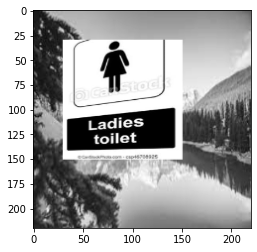

[0. 0. 0. 0. 0. 1. 0. 0.]


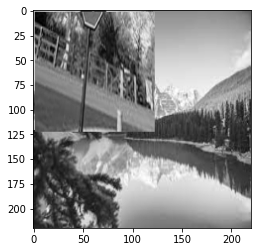

[0. 0. 0. 0. 0. 0. 0. 1.]


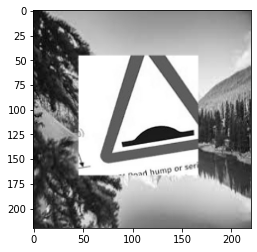

[0. 0. 0. 0. 1. 0. 0. 0.]


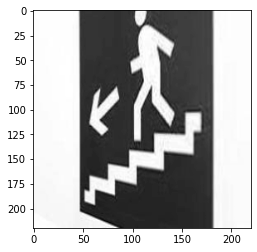

[0. 0. 0. 0. 0. 1. 0. 0.]


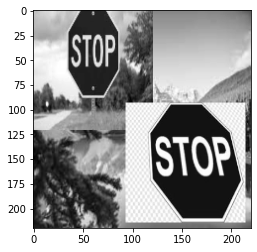

[0. 0. 0. 0. 0. 0. 1. 0.]


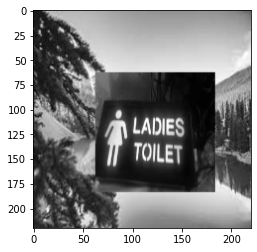

[0. 0. 0. 0. 0. 0. 1. 0.]


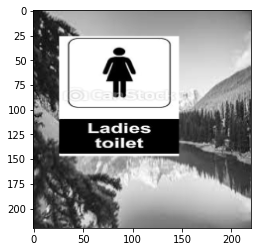

[0. 0. 0. 0. 0. 0. 0. 1.]


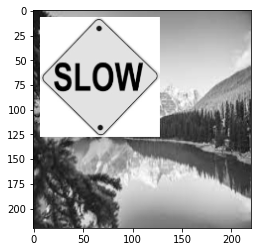

[0. 0. 1. 0. 0. 0. 0. 0.]


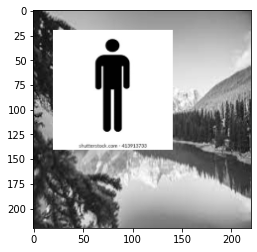

[1. 0. 0. 0. 0. 0. 0. 0.]


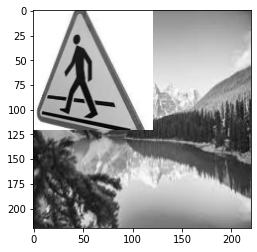

In [ ]:
for i in range(10):
  i = np.random.randint(0, len(images))
  print(labels[i])
  plt.imshow(images[i,:,:,0], cmap = 'gray')
  plt.show()

In [ ]:
testing_images = images[:int(200)]
testing_labels = labels[:int(200)]
images = images[int(200):]
labels = labels[int(200):]
print(testing_images.shape)
print(testing_labels.shape)
print(images.shape)
print(labels.shape)

(200, 220, 220, 1)
(200, 8)
(2975, 220, 220, 1)
(2975, 8)


In [ ]:
images , labels = shuffle(images, labels)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential, Model

In [ ]:
# 220 180
fix = 220
model = Sequential()
model.add(ly.Conv2D(64, (2,2), input_shape = (fix,fix,1), activation = 'relu'))
model.add(ly.MaxPooling2D(2,2))
model.add(ly.Conv2D(64, (2,2) ,activation = 'relu'))
model.add(ly.MaxPooling2D(2,2))
model.add(ly.Dropout(0.1))
model.add(ly.Conv2D(128, (3,3), activation = 'relu'))
model.add(ly.MaxPooling2D(3,3))
model.add(ly.Dropout(0.1))
model.add(ly.Conv2D(128, (3,3), activation = 'relu'))
model.add(ly.MaxPooling2D(3,3))
model.add(ly.Conv2D(256, (3,3), activation = 'relu'))
model.add(ly.MaxPooling2D(3,3))
model.add(ly.Dropout(0.1))
model.add(ly.Flatten())
model.add(ly.Dense(64, activation = 'relu'))
model.add(ly.Dense(8, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 219, 219, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model.fit(xtrain, ytrain,validation_data=(xtest, ytest),  epochs = 50)

Epoch 1/50
94/94 [==============================] - 8s 77ms/step - loss: 0.1267 - accuracy: 0.1156 - val_loss: 0.1250 - val_accuracy: 0.1175
Epoch 2/50
94/94 [==============================] - 7s 75ms/step - loss: 0.1251 - accuracy: 0.1106 - val_loss: 0.1250 - val_accuracy: 0.1084
Epoch 3/50
94/94 [==============================] - 7s 75ms/step - loss: 0.1250 - accuracy: 0.1129 - val_loss: 0.1250 - val_accuracy: 0.1084
Epoch 4/50
94/94 [==============================] - 7s 75ms/step - loss: 0.1250 - accuracy: 0.1089 - val_loss: 0.1250 - val_accuracy: 0.1084
Epoch 5/50
94/94 [==============================] - 7s 75ms/step - loss: 0.1250 - accuracy: 0.1116 - val_loss: 0.1250 - val_accuracy: 0.1084
Epoch 6/50
94/94 [==============================] - 7s 75ms/step - loss: 0.1150 - accuracy: 0.1327 - val_loss: 0.1146 - val_accuracy: 0.1295
Epoch 7/50
94/94 [==============================] - 7s 74ms/step - loss: 0.1096 - accuracy: 0.1521 - val_loss: 0.1114 - val_accuracy: 0.1295
Epoch 8/50
94

In [ ]:
pred, true = [], []
for i in range(len(testing_images)):
  pred_ = model.predict(np.array([testing_images[i]]), verbose = 0)[0]
  pred.append(np.argmax(pred_))
  true.append(np.argmax(testing_labels[i]))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
score = accuracy_score(pred, true)
f1 = f1_score(pred, true, average = 'micro')
matr = confusion_matrix(pred, true)
cls = classification_report(pred, true)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('stairs_class.h5', model)

In [3]:
from tensorflow.keras.models import load_model
model= load_model('stairs_class_.h5')

In [15]:
pred, true = [], []
for i in range(1000):
  x = model.predict(np.array([images[i]]), verbose = 0)
  pred_ = np.argmax(x[0])
  true_ = np.argmax(labels[i])
  pred.append(pred_)
  true.append(true_)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
print('accuracy of the model')
print(accuracy_score(pred, true))

accuracy of the model
0.891


confusion matrix


Text(0.5, 1.0, 'confusion matrix')

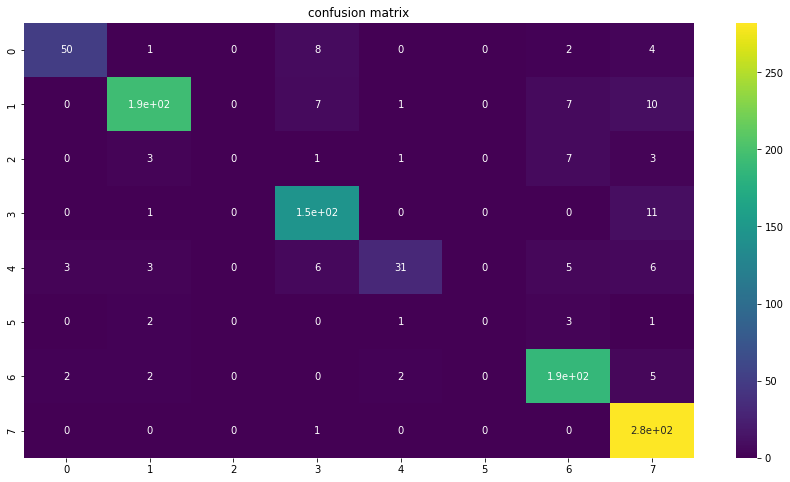

In [26]:
print('confusion matrix')
plt.figure(figsize = (15, 8))
matr = confusion_matrix(pred, true)
sns.heatmap(matr, annot = True, cmap = 'viridis')
plt.title('confusion matrix')

In [19]:
# classification report
print(classification_report(pred, true))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        65
           1       0.94      0.89      0.91       219
           2       0.00      0.00      0.00        15
           3       0.86      0.92      0.89       158
           4       0.86      0.57      0.69        54
           5       0.00      0.00      0.00         7
           6       0.89      0.94      0.91       199
           7       0.88      1.00      0.93       283

    accuracy                           0.89      1000
   macro avg       0.67      0.64      0.65      1000
weighted avg       0.87      0.89      0.88      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
f1 = f1_score(pred, true, average = 'micro')
print(f1)

0.891


In [ ]:
d = {'crosswalk':0, 'exit':1, 'mwr':2, 'sr':3, 'stair':4, 'stop':5, 'wwr':6, 'bump':7}

In [ ]:
fix = 220
img = cv2.imread('/content/32fee405-3e38-45f2-9c70-394afc9f1fd9.jpg', 0)
img = cv2.resize(img, (fix, fix))
img = cv2.normalize(img, np.zeros((fix, fix)), 0, 255, cv2.NORM_MINMAX)/255
img = np.array([img]).reshape(fix, fix, 1)
np.argmax(model.predict(np.array([img])))